## Data Cleaning

In this section, I will be using the data obtained from the [NCDC](https://www.ncdc.noaa.gov/cdo-web/webservices/v2#data) weather API, which contains the maximum daily temperature `(TMAX)`, minimum daily temperature `(TMIN)`, and the average daily temperature `(TAVG)` from the **LaGuardia Airport** station in **New York City**
for Feb 2023:. I explored getting the data in this [notebook](./2-data_collection_using_weather_api.ipynb)


### Objective
Make a little tweaks to the data that will make it easier to use: 
- renaming columns
- converting each column into the most appropriate data type,
- sorting,
- and reindexing.


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in the data
df = pd.read_csv("../data/temp_nyc_laguadia_station_2023_02_20.csv")
df.head()

,date,datatype,station,attributes,value
0,2023-03-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",3.9
1,2023-03-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",6.7
2,2023-03-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",0.6
3,2023-03-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",6.3
4,2023-03-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",11.7


### Renaming Columns

Since the API endpoint used could return data of any units and category, it had to call
that column `value`. I only pulled temperature data in Celsius, so all our observations
have the same units. This means that I can rename the `value` column so that it's clear
what data we are working with:

In [3]:
# check the columns
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [4]:
df.rename(columns={"value": "temp_C", "attributes": "flags"}, inplace=True)

In [5]:
# Sanity check
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [6]:
# Can Transform the column names to Upper case
df.rename(str.upper, axis="columns").columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

### Type Conversion
Now that the column names are indicative of the data they contain, we can check what
types of data they hold.


In [7]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

The date columns is not in `datetime` data type. We can use `pd.to_datetime()` to convert it

Dealing with dates can be tricky since they come in many different formats and time
zones; fortunately, pandas has more methods we can use for dealing with converting
datetime objects.

In [8]:
new_df = df.assign(
    date=pd.to_datetime(df["date"]),
    temp_F = (df["temp_C"] * 9/5) + 32
)

In [9]:
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

Additionally, we can use the `astype()` method to convert **one column at a time**. As
an example, let's say we only cared about the temperatures at every whole number, but
we don't want to round. In this case, we simply want to chop off the information after
the decimal. To accomplish this, we can cast the floats as integers. 

This time, we will use `lambda` functions, which make it possible to access the `temp_F` column 
to create the `temp_F_whole` column, even though `df` doesn't have this column before we call `assign()`. 
It is very common (and useful) to use lambda functions with assign():

In [10]:
df = df.assign(
    date = lambda x: pd.to_datetime(x.date),
    temp_C_whole = lambda x:x.temp_C.astype("int"),
    temp_F = lambda x: (x.temp_C * 9/5) + 32, 
    temp_F_whole = lambda x: x.temp_F.astype("int")
)


In [11]:
df.dtypes

date            datetime64[ns]
datatype                object
station                 object
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [12]:
df_with_categories = df.assign(
    station = df.station.astype("category"),
    datatype = df.datatype.astype("category")
)

In [13]:
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

## Reordering, Reindexing and sorting data



### **`Reordering`**
We will often find the need to sort our data by the values of one or many columns. Say
we wanted to find the days that reached the highest temperatures in **New York City**
during March 2023; we could sort our values by the `temp_C` (or `temp_F`) column in
descending order and use head() to select the number of days we wanted to see. To
accomplish this, we can use the `sort_values()` method. Let's look at the top 10 days:

In [14]:
df[df["datatype"] == "TMAX"].sort_values(by="temp_C", ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
76,2023-03-26,TMAX,GHCND:USW00014732,",,W,2400",17.2,17,62.96,62
61,2023-03-21,TMAX,GHCND:USW00014732,",,W,2400",16.7,16,62.06,62
67,2023-03-23,TMAX,GHCND:USW00014732,",,W,2400",16.1,16,60.98,60
46,2023-03-16,TMAX,GHCND:USW00014732,",,W,2400",15.0,15,59.00,59
49,2023-03-17,TMAX,GHCND:USW00014732,",,W,2400",15.0,15,59.00,59
64,2023-03-22,TMAX,GHCND:USW00014732,",,W,2400",15.0,15,59.00,59
79,2023-03-27,TMAX,GHCND:USW00014732,",,W,2400",14.4,14,57.92,57
70,2023-03-24,TMAX,GHCND:USW00014732,",,W,2400",14.4,14,57.92,57
52,2023-03-18,TMAX,GHCND:USW00014732,",,W,2400",13.3,13,55.94,55
91,2023-03-31,TMAX,GHCND:USW00014732,",,W,2400",13.3,13,55.94,55


Notice the date is not sorted. Also, there are dates with the same temperatures. For instance, 16th, 17th, 22th. The `sort_values` method can be used with list of column names to break the tie.

In [15]:
df[df["datatype"] == "TMAX"].sort_values(by=["temp_C", "date"], ascending=[False, True]).head()


,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
76,2023-03-26,TMAX,GHCND:USW00014732,",,W,2400",17.2,17,62.96,62
61,2023-03-21,TMAX,GHCND:USW00014732,",,W,2400",16.7,16,62.06,62
67,2023-03-23,TMAX,GHCND:USW00014732,",,W,2400",16.1,16,60.98,60
46,2023-03-16,TMAX,GHCND:USW00014732,",,W,2400",15.0,15,59.00,59
49,2023-03-17,TMAX,GHCND:USW00014732,",,W,2400",15.0,15,59.00,59


Since we are sorting in ascending order, in the case of a tie, the date that comes earlier in
the year will be above the later one. Notice how Marcg 16th is now above March 12th,
despite both having the same temperature reading:


Pandas also provides an additional way to look at a subset of the sorted values; we can use
`nlargest()` to grab the n rows with the largest values according to specific criteria and
`nsmallest()` to grab the n smallest rows, without the need to sort the data beforehand.

In [16]:
# Get the top ten average TAVG in temp_C

df[df["datatype"] == "TAVG"].nlargest(n=10, columns="temp_C")

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
63,2023-03-22,TAVG,GHCND:USW00014732,"H,,S,",11.6,11,52.88,52
66,2023-03-23,TAVG,GHCND:USW00014732,"H,,S,",11.1,11,51.98,51
78,2023-03-27,TAVG,GHCND:USW00014732,"H,,S,",11.0,11,51.80,51
48,2023-03-17,TAVG,GHCND:USW00014732,"H,,S,",10.9,10,51.62,51
69,2023-03-24,TAVG,GHCND:USW00014732,"H,,S,",10.7,10,51.26,51
51,2023-03-18,TAVG,GHCND:USW00014732,"H,,S,",10.4,10,50.72,50
75,2023-03-26,TAVG,GHCND:USW00014732,"H,,S,",10.1,10,50.18,50
60,2023-03-21,TAVG,GHCND:USW00014732,"H,,S,",9.9,9,49.82,49
84,2023-03-29,TAVG,GHCND:USW00014732,"H,,S,",8.2,8,46.76,46
15,2023-03-06,TAVG,GHCND:USW00014732,"H,,S,",7.8,7,46.04,46


The result shows the warmest days recorded in the month of March, 2023. The top ten `TAVG` in celcius ranges from 11.6-7.8 degrees

Having our columns in alphabetical order can come handy when using `loc[]`because
we can specify a range of columns with similar names; for example, we could now use
`df.loc[:,'station':'temp_F_whole']` to easily grab all of our temperature
columns, along with the station information:

In [17]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2023-03-01,"H,,S,",GHCND:USW00014732,3.9,3,39.02,39
1,TMAX,2023-03-01,",,W,2400",GHCND:USW00014732,6.7,6,44.06,44
2,TMIN,2023-03-01,",,W,2400",GHCND:USW00014732,0.6,0,33.08,33
3,TAVG,2023-03-02,"H,,S,",GHCND:USW00014732,6.3,6,43.34,43
4,TMAX,2023-03-02,",,W,2400",GHCND:USW00014732,11.7,11,53.06,53


Sometimes, we don't care too much about the numeric index, but we would like to use
one (or more) of the other columns as the index instead. In this case, we can use the
`set_index()` method. Let's set the date column as our index:

In [18]:
df.set_index("date", inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2023-03-01,TAVG,GHCND:USW00014732,"H,,S,",3.9,3,39.02,39
2023-03-01,TMAX,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44
2023-03-01,TMIN,GHCND:USW00014732,",,W,2400",0.6,0,33.08,33
2023-03-02,TAVG,GHCND:USW00014732,"H,,S,",6.3,6,43.34,43
2023-03-02,TMAX,GHCND:USW00014732,",,W,2400",11.7,11,53.06,53


Setting the index to a datetime lets us take advantage of datetime slicing and indexing,

In [19]:
df['2023-03-01':'2023-03-02']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2023-03-01,TAVG,GHCND:USW00014732,"H,,S,",3.9,3,39.02,39
2023-03-01,TMAX,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44
2023-03-01,TMIN,GHCND:USW00014732,",,W,2400",0.6,0,33.08,33
2023-03-02,TAVG,GHCND:USW00014732,"H,,S,",6.3,6,43.34,43
2023-03-02,TMAX,GHCND:USW00014732,",,W,2400",11.7,11,53.06,53
2023-03-02,TMIN,GHCND:USW00014732,",,W,2400",3.9,3,39.02,39


This gives us the data from March 01, 2023 through March 02, 2023 (inclusive of both
endpoints):

We can use `reset_index` to restore the date column


In [20]:
df.reset_index().head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2023-03-01,TAVG,GHCND:USW00014732,"H,,S,",3.9,3,39.02,39
1,2023-03-01,TMAX,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44
2,2023-03-01,TMIN,GHCND:USW00014732,",,W,2400",0.6,0,33.08,33
3,2023-03-02,TAVG,GHCND:USW00014732,"H,,S,",6.3,6,43.34,43
4,2023-03-02,TMAX,GHCND:USW00014732,",,W,2400",11.7,11,53.06,53


### **`Reindex()`**

As an example, we will turn to the S&P 500 stock data in the sp500.csv file. It contains
the **opening, high, low, and closing** (also called OHLC) prices daily for the S&P 500 from
2017 through the end of 2018, along with **volume** traded and the adjusted close (which we
won't use). Let's read it in, setting the date column as the index and parsing the dates:

In [21]:
# Read in the data
sp = pd.read_csv("../data/sp500.csv", index_col="date", parse_dates=True).drop(["adj_close"], axis=1)

In [22]:
sp.head()

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000


Let's see what our data looks like and mark the day of the week for each row in order to
understand what the index contains.

In [37]:
sp.head(10).assign(data_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,data_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


If were to analyze the performance of a group of asset in our portfolio that includes S&P500 and something
that trades on weekend, such as bitcoin, we would need to have values for everyday of the week for the S&P 500.

Otherwise when looking at the daily value of our portfolio, we would notice huge drops the days the market was closed.

In [42]:
bitcoin = pd.read_csv("../data/bitcoin.csv", 
                      index_col="date",
                      parse_dates=True).drop(columns=["market_cap"], axis=1)

In [43]:
bitcoin

,open,high,low,close,volume
date,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008
...,...,...,...,...,...
2018-12-27,3854.69,3874.42,3645.45,3654.83,5130222366
2018-12-28,3653.13,3956.14,3642.63,3923.92,5631554348
2018-12-29,3932.49,3963.76,3820.41,3820.41,4991655917


To analyze the portfolio, we will need to aggregate the data by day

In [50]:
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(["date"]).sum()

In [55]:
portfolio.head(10).assign(day_of_week = lambda x:x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


Now we see we have value for everyday of the week. Which is so good, so far.

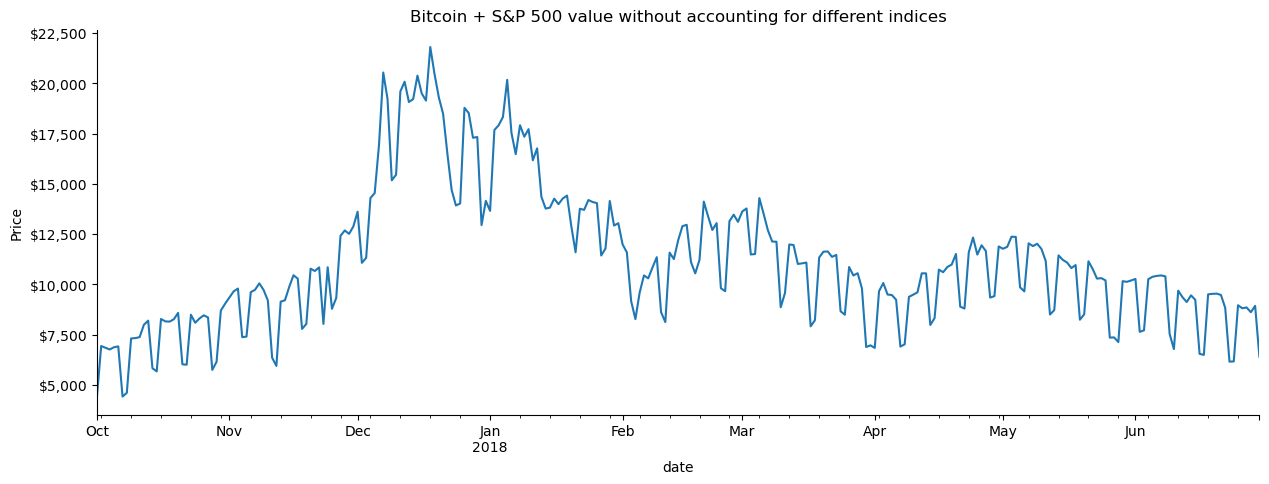

In [76]:
# Plot the closing price from Q4 2017 through Q2 2018
from matplotlib.ticker import StrMethodFormatter

ax = portfolio.loc["2017-Q4":"2018-Q2"].plot(y="close", figsize=(15,5), legend=False, 
                                        title="Bitcoin + S&P 500 value without accounting for different indices")

# Formatting
ax.set_ylabel("Price")
ax.yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))


for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

Notice how there is a cyclical pattern here? It is dropping every day the market is closed
because the aggregation only had bitcoin data to sum for those days:

This is clearly a problem: an asset value doesn't drop to zero whenever the market is closed.

If we want pandas to fill the missing data in for us, we will need to reindex the
S&P 500 data with bitcoin's index using the `reindex()` method,

In [81]:
sp.reindex(bitcoin.index, method="ffill").assign(day_of_week = lambda x:x.index.day_name()).head(10)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


The volume traded (volume) column makes it seem like the days we used forward-filling for are actually days when the market is open.
Ideally, we only want to maintain the value of the stock when the stock market is closed—the volume traded should be zero.

In other to handle the NaN values in different manner for each column, we will turn to `assign` method.

In [85]:
sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume = lambda x:x.volume.fillna(0),
    close = lambda x:x.close.fillna(method="ffill"),
    open = lambda x: np.where(x.open.isnull(), x.close, x.open),
    high = lambda x: np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low)) 

In [87]:
sp_reindexed.head(10).assign(day_of_week=lambda x:x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


Now, let's recreate the portfolio with the reindexed S&P 500 data and use a visualization to
compare it with the previous attempt

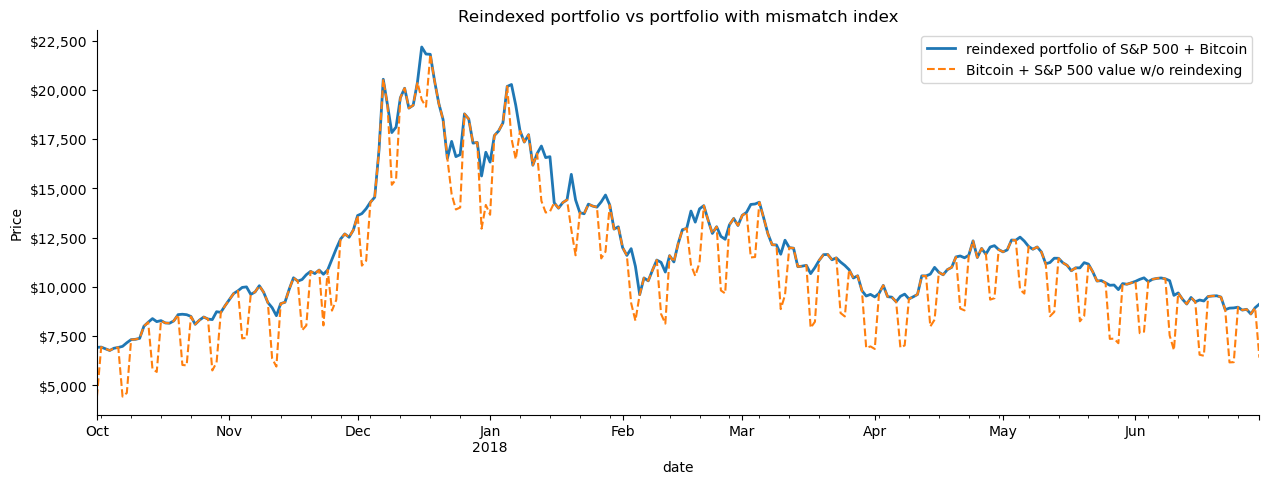

In [110]:
fixed_portfolio = pd.concat([sp_reindexed, bitcoin], sort=False).groupby(["date"]).sum()

# plot the reindexed portfolio's close (Q4 2017 - Q2 2018)
ax= fixed_portfolio.loc["2017-Q4":"2018-Q2"].plot(y="close", figsize=(15,5), 
                                              linewidth=2,
                                             label='reindexed portfolio of S&P 500 + Bitcoin',
                                             title = "Reindexed portfolio vs portfolio with mismatch index")

# add line for original portfolio for comparison
portfolio.loc["2017-Q4":"2018-Q2"].plot(y="close", figsize=(15,5), ax=ax, linestyle="--",
                                        label="Bitcoin + S&P 500 value w/o reindexing")

ax.set_ylabel("Price")
ax.yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.show();